In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import sqlalchemy as sa
sns.set_style("whitegrid")
import plotly.express as px
import matplotlib.pyplot as plt
import streamlit as st 

In [2]:
file_path = r'D:\IDMP\PROJECT\Makaan_Properties_Buy.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
data.head(5)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [4]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,332086,332087,332088,332089,332090,332091,332092,332093,332094,332095
Property_Name,Arkiton Luxe,Keshav Akshar Ocean Pearl,Vishwa Opulence,Satyam Sarjan,Navkar Sunflower,Kailash The Willows,Elite Elite Mercury,Shivam Rajvi Opal,DR Praharsh Platinium,Parshwa Venue 82,...,Antalica Tower,SD Codename Hello Epic,SD Codename Hello Epic,SD Codename Hello Epic,Rajlaxmi RaajLaxmi Towers,Rajlaxmi RaajLaxmi Towers,Rajlaxmi RaajLaxmi Towers,Rajlaxmi RaajLaxmi Towers,Rajlaxmi RaajLaxmi Towers,Rajlaxmi RaajLaxmi Towers
Property_id,15446514,15367414,14683118,5476295,15477040,15520995,15524131,12850089,14242412,14582561,...,14646922,14183690,14183689,12814702,10324768,10324765,15076701,10324762,15076700,14683740
Property_type,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,...,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment
Property_status,Under Construction,Under Construction,Ready to move,Ready to move,Under Construction,Under Construction,Under Construction,Ready to move,Under Construction,Under Construction,...,Under Construction,Under Construction,Under Construction,Under Construction,Under Construction,Under Construction,Under Construction,Under Construction,Under Construction,Under Construction
Price_per_unit_area,"4,285","7,000","5,752","2,486","5,324","2,593","3,502","6,031","4,106","4,456",...,"6,091","44,712","43,021","47,906","9,200","9,826","8,568","9,861","8,813","9,859"
Posted_On,1 day ago,2 days ago,2 days ago,5 days ago,8 days ago,9 days ago,9 days ago,2 days ago,5 days ago,5 days ago,...,6 months ago,4 months ago,4 months ago,4 months ago,4 months ago,4 months ago,4 months ago,4 months ago,4 months ago,4 months ago
Project_URL,https://www.makaan.com/ahmedabad/arkiton-life-...,https://www.makaan.com/ahmedabad/keshav-naraya...,https://www.makaan.com/ahmedabad/vishwa-develo...,https://www.makaan.com/ahmedabad/satyam-develo...,https://www.makaan.com/ahmedabad/navkar-buildc...,https://www.makaan.com/ahmedabad/kailash-build...,https://www.makaan.com/ahmedabad/elite-group-t...,https://www.makaan.com/ahmedabad/shivam-builde...,https://www.makaan.com/ahmedabad/dr-infrastruc...,https://www.makaan.com/ahmedabad/parshwa-build...,...,https://www.makaan.com/mumbai/antalica-group-t...,https://www.makaan.com/mumbai/sd-corp-codename...,https://www.makaan.com/mumbai/sd-corp-codename...,https://www.makaan.com/mumbai/sd-corp-codename...,https://www.makaan.com/mumbai/rajlaxmi-develop...,https://www.makaan.com/mumbai/rajlaxmi-develop...,https://www.makaan.com/mumbai/rajlaxmi-develop...,https://www.makaan.com/mumbai/rajlaxmi-develop...,https://www.makaan.com/mumbai/rajlaxmi-develop...,https://www.makaan.com/mumbai/rajlaxmi-develop...
builder_id,100563465.0,100009433.0,100207731.0,101303.0,1484209.0,625490.0,100093142.0,105967.0,1380256.0,100207622.0,...,100479765.0,103115.0,103115.0,103115.0,561277.0,561277.0,561277.0,561277.0,561277.0,561277.0
Builder_name,Arkiton life Space,Keshav Narayan Group,Vishwa Developers Ahmedabad,Satyam Developers,Navkar Buildcon Ahmedabad,Kailash Buildcon,Elite Group Tagad,Shivam Builders Pvt Ltd,DR Infrastructure,Parshwa Buildcon,...,Antalica Group,SD Corp,SD Corp,SD Corp,Rajlaxmi Developers Mumbai,Rajlaxmi Developers Mumbai,Rajlaxmi Developers Mumbai,Rajlaxmi Developers Mumbai,Rajlaxmi Developers Mumbai,Rajlaxmi Developers Mumbai
Property_building_status,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,...,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE


In [5]:
data.shape

(332096, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             217826 non-null  object 
 1   Property_id               332096 non-null  int64  
 2   Property_type             332096 non-null  object 
 3   Property_status           271654 non-null  object 
 4   Price_per_unit_area       332096 non-null  object 
 5   Posted_On                 332096 non-null  object 
 6   Project_URL               332096 non-null  object 
 7   builder_id                149978 non-null  float64
 8   Builder_name              149978 non-null  object 
 9   Property_building_status  332096 non-null  object 
 10  City_id                   332096 non-null  int64  
 11  City_name                 332096 non-null  object 
 12  No_of_BHK                 332096 non-null  object 
 13  Locality_ID               332096 non-null  i

In [7]:
data.describe()

,Property_id,builder_id,City_id,Locality_ID,Longitude,Latitude,Sub_urban_ID,listing_domain_score
count,3.320960e+05,1.499780e+05,332096.000000,332096.000000,332096.000000,332096.000000,332096.000000,332096.000000
mean,1.319382e+07,1.108900e+07,12.137861,63082.944775,77.626544,19.761817,10140.731770,4.005565
std,2.533792e+06,3.100384e+07,7.270491,26246.913783,4.163027,5.311124,197.784494,0.124058
min,5.000114e+06,1.000020e+05,1.000000,50001.000000,23.526030,8.403612,10003.000000,4.000000
25%,1.244466e+07,1.006780e+05,5.000000,50378.000000,73.033897,13.580514,10040.000000,4.000000
50%,1.419741e+07,1.034750e+05,12.000000,51893.000000,77.666607,19.165211,10071.000000,4.000000
75%,1.509555e+07,6.547740e+05,18.000000,60223.000000,80.157450,23.048038,10226.000000,4.000000
max,1.558147e+07,1.007295e+08,23.000000,173237.000000,88.861885,87.360603,11618.000000,9.107140


In [8]:
data.columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id',
       'Builder_name', 'Property_building_status', 'City_id', 'City_name',
       'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category'],
      dtype='object')

In [9]:
data.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area          object
Posted_On                    object
Project_URL                  object
builder_id                  float64
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                    object
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                        object
Size                         object
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move            

### Preprocessing - Data Cleaning & Data Transformation

In [10]:
# Checking for missing values 
data.isnull().sum()

Property_Name               114270
Property_id                      0
Property_type                    0
Property_status              60442
Price_per_unit_area              0
Posted_On                        0
Project_URL                      0
builder_id                  182118
Builder_name                182118
Property_building_status         0
City_id                          0
City_name                        0
No_of_BHK                        0
Locality_ID                      0
Locality_Name                    2
Longitude                        0
Latitude                         0
Price                            0
Size                             0
Sub_urban_ID                     0
Sub_urban_name                   0
description                      1
is_furnished                     0
listing_domain_score             0
is_plot                          0
is_RERA_registered               0
is_Apartment                     0
is_ready_to_move                 0
is_commercial_Listin

In [11]:
data = data.dropna(subset = ['Property_Name', 'builder_id', 'Builder_name', 'Locality_Name'])

In [12]:
data.isnull().sum()

Property_Name                  0
Property_id                    0
Property_type                  0
Property_status             6268
Price_per_unit_area            0
Posted_On                      0
Project_URL                    0
builder_id                     0
Builder_name                   0
Property_building_status       0
City_id                        0
City_name                      0
No_of_BHK                      0
Locality_ID                    0
Locality_Name                  0
Longitude                      0
Latitude                       0
Price                          0
Size                           0
Sub_urban_ID                   0
Sub_urban_name                 0
description                    0
is_furnished                   0
listing_domain_score           0
is_plot                        0
is_RERA_registered             0
is_Apartment                   0
is_ready_to_move               0
is_commercial_Listing          0
is_PentaHouse                  0
is_studio 

In [13]:
data = data.fillna('Not determined')

In [14]:
data.isnull().sum()

Property_Name               0
Property_id                 0
Property_type               0
Property_status             0
Price_per_unit_area         0
Posted_On                   0
Project_URL                 0
builder_id                  0
Builder_name                0
Property_building_status    0
City_id                     0
City_name                   0
No_of_BHK                   0
Locality_ID                 0
Locality_Name               0
Longitude                   0
Latitude                    0
Price                       0
Size                        0
Sub_urban_ID                0
Sub_urban_name              0
description                 0
is_furnished                0
listing_domain_score        0
is_plot                     0
is_RERA_registered          0
is_Apartment                0
is_ready_to_move            0
is_commercial_Listing       0
is_PentaHouse               0
is_studio                   0
Listing_Category            0
dtype: int64

In [15]:
# Checking the types of BHK in 'No_of_BHK'
data['No_of_BHK'].unique()

array(['3 BHK', '4 BHK', '2 BHK', '5 BHK', '1 BHK', '1 RK', '0 BHK',
       '6 BHK', '7 BHK', '11 BHK', '9 BHK', '10 BHK', '8 BHK', '3 RK',
       '14 BHK', '2 RK', '12 BHK'], dtype=object)

In [16]:
print(len(data[data['No_of_BHK'] == '1 RK']))
print(len(data[data['No_of_BHK'] == '2 RK']))
print(len(data[data['No_of_BHK'] == '3 RK']))

1175
1
2


In [17]:
data.drop(data[(data['No_of_BHK'] =='1 RK') | (data['No_of_BHK'] == '2 RK') | (data['No_of_BHK'] == '3 RK')].index,inplace=True)

In [18]:
data['No_of_BHK'].unique()

array(['3 BHK', '4 BHK', '2 BHK', '5 BHK', '1 BHK', '0 BHK', '6 BHK',
       '7 BHK', '11 BHK', '9 BHK', '10 BHK', '8 BHK', '14 BHK', '12 BHK'],
      dtype=object)

In [19]:
data[data['No_of_BHK'] == '0 BHK'].head(5)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
272,Addor SWAYAM Plots AND Weekend Homes in Sanand,13609650,Residential Plot,Ready to move,731,2 months ago,https://www.makaan.com/ahmedabad/addor-realty-...,109526.0,Addor Realty,ACTIVE,...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
274,Addor SWAYAM Plots AND Weekend Homes in Sanand,14278504,Residential Plot,Ready to move,730,2 months ago,https://www.makaan.com/ahmedabad/addor-realty-...,109526.0,Addor Realty,ACTIVE,...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
275,Davda Bellevue Vieraaa,12898287,Residential Plot,Ready to move,"1,111",3 months ago,https://www.makaan.com/ahmedabad/davda-infrast...,105087.0,Davda Infrastructure,ACTIVE,...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
276,Davda Bellevue Vieraaa,14248883,Residential Plot,Ready to move,"1,166",3 months ago,https://www.makaan.com/ahmedabad/davda-infrast...,105087.0,Davda Infrastructure,ACTIVE,...,Unfurnished,4.0,True,False,False,True,False,False,False,sell
277,Davda Bellevue Vieraaa,12898283,Residential Plot,Ready to move,"1,055",3 months ago,https://www.makaan.com/ahmedabad/davda-infrast...,105087.0,Davda Infrastructure,ACTIVE,...,Unfurnished,4.0,True,False,False,True,False,False,False,sell


In [20]:
data['Size'] = data['Size'].replace("sq ft","",regex=True)
data['Size'] = data['Size'].replace(",","",regex=True)
data['Size'] = data['Size'].astype(int)

data['Price_per_unit_area'] = data['Price_per_unit_area'].replace(',', '',regex=True)
data['Price_per_unit_area'] = data['Price_per_unit_area'].astype(int)

data['No_of_BHK'] = data['No_of_BHK'].replace('BHK', '',regex=True)
data['No_of_BHK'] = data['No_of_BHK'].astype(int)

data['Price'] = data['Price'].replace(',', '',regex=True)
data['Price'] = data['Price'].astype(int)

data['is_RERA_registered'] = data['is_RERA_registered'].astype('object')
data['is_PentaHouse'] = data['is_PentaHouse'].astype('object')

data['builder_id'] = data['builder_id'].astype(int)

In [21]:
data.drop(columns = ['Project_URL', 'listing_domain_score', 'Listing_Category'], inplace = True)

In [22]:
from datetime import datetime, timedelta
import re
  
 
# Function to calculate the actual date
def calculate_posted_date(posted_on):
    try:
        if isinstance(posted_on, str):
            if any(unit in posted_on for unit in ['hour', 'minute', 'second']):
                # Handle hours, minutes, and seconds as the current date
                return datetime.now().strftime('%Y-%m-%d')
            elif "day" in posted_on:
                # Handle "a day ago" or "X days ago"
                days_ago = 1 if "a day" in posted_on else int(re.search(r'\d+', posted_on).group())
                return (datetime.now() - timedelta(days=days_ago)).strftime('%Y-%m-%d')
            elif "month" in posted_on:
                # Handle "a month ago" or "X months ago"
                months_ago = 1 if "a month" in posted_on else int(re.search(r'\d+', posted_on).group())
                return (datetime.now().replace(day=1) - timedelta(days=months_ago * 30)).strftime('%Y-%m-%d')
            elif "year" in posted_on:
                # Handle "a year ago" or "X years ago"
                years_ago = 1 if "a year" in posted_on else int(re.search(r'\d+', posted_on).group())
                return (datetime.now().replace(year=datetime.now().year - years_ago)).strftime('%Y-%m-%d')
            else:
                # If no relative time, try to parse as a standard date
                return pd.to_datetime(posted_on).strftime('%Y-%m-%d')
        else:
            return posted_on
    except Exception as e:
        print(f"Error processing value: {posted_on}. Error: {e}")
        return None
 
# Apply the function to the 'Posted_On' column
data['Posted_On'] = data['Posted_On'].apply(calculate_posted_date)

In [23]:
data.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area           int32
Posted_On                    object
builder_id                    int32
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                     int32
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                         int32
Size                          int32
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
is_plot                        bool
is_RERA_registered           object
is_Apartment                   bool
is_ready_to_move               bool
is_commercial_Listing          bool
is_PentaHouse               

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148798 entries, 0 to 332095
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             148798 non-null  object 
 1   Property_id               148798 non-null  int64  
 2   Property_type             148798 non-null  object 
 3   Property_status           148798 non-null  object 
 4   Price_per_unit_area       148798 non-null  int32  
 5   Posted_On                 148798 non-null  object 
 6   builder_id                148798 non-null  int32  
 7   Builder_name              148798 non-null  object 
 8   Property_building_status  148798 non-null  object 
 9   City_id                   148798 non-null  int64  
 10  City_name                 148798 non-null  object 
 11  No_of_BHK                 148798 non-null  int32  
 12  Locality_ID               148798 non-null  int64  
 13  Locality_Name             148798 non-null  object

In [25]:
# Check invalid Longitude/Latitude 

geo_outliers = data[(data['Longitude'] < -180) | (data['Longitude'] > 180) |
                       (data['Latitude'] < -90) | (data['Latitude'] > 90)]
 
print("\nInvalid Geographic Coordinates:")
print(geo_outliers[['Longitude', 'Latitude']])


Invalid Geographic Coordinates:
Empty DataFrame
Columns: [Longitude, Latitude]
Index: []


Summary Statistics:
       Price_per_unit_area         Price           Size
count        148798.000000  1.487980e+05  148798.000000
mean          10301.862418  1.328801e+07    1306.181723
std            8549.650306  1.923736e+07     972.127525
min             100.000000  3.000000e+03      30.000000
25%            5000.000000  4.996513e+06     746.000000
50%            7674.000000  8.268500e+06    1100.000000
75%           12844.000000  1.500000e+07    1550.000000
max          171969.000000  8.000000e+08   90000.000000


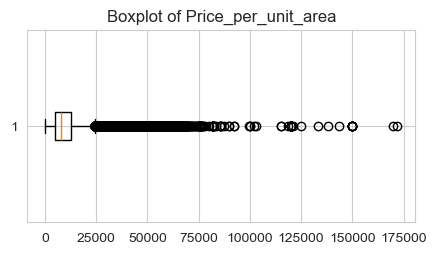

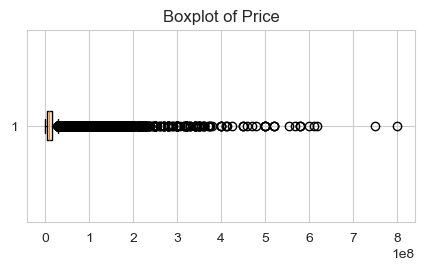

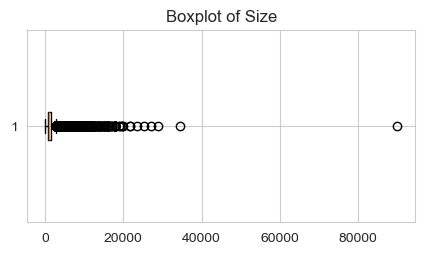

Price_per_unit_area: 9430 outliers detected
Price: 11592 outliers detected
Size: 7851 outliers detected

Outlier Summary:
Price_per_unit_area: 9430 outliers
Price: 11592 outliers
Size: 7851 outliers

Dataset shape after removing outliers: (126215, 29)

Outliers handled by capping extreme values.


In [26]:
# Columns to check
columns_to_check = ['Price_per_unit_area', 'Price', 'Size']
 
# 1. Summary Statistics
print("Summary Statistics:")
print(data[columns_to_check].describe())
 
# 2. Visualize Data
for col in columns_to_check:
    plt.figure(figsize=(5, 2.5))
    plt.boxplot(data[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()
 
# 3. Detect Outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
 
# Apply outlier detection
outliers_summary = {}
for col in columns_to_check:
    outliers = detect_outliers_iqr(data[col])
    outliers_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers detected")
 
# Display outlier counts
print("\nOutlier Summary:")
for col, count in outliers_summary.items():
    print(f"{col}: {count} outliers")
 
# 4. Handle Outliers
# Option A: Remove Outliers
dataset_cleaned = data.copy()
for col in columns_to_check:
    Q1 = dataset_cleaned[col].quantile(0.25)
    Q3 = dataset_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset_cleaned = dataset_cleaned[(dataset_cleaned[col] >= lower_bound) & (dataset_cleaned[col] <= upper_bound)]
 
print(f"\nDataset shape after removing outliers: {dataset_cleaned.shape}")
 
print("\nOutliers handled by capping extreme values.")

In [27]:
dataset_cleaned = dataset_cleaned.drop_duplicates(subset=['Property_id','builder_id'], keep='first')

In [28]:
dataset_cleaned.shape

(86252, 29)

In [29]:
data = dataset_cleaned

In [30]:
data.shape

(86252, 29)

In [31]:
data.describe()

,Property_id,Price_per_unit_area,builder_id,City_id,No_of_BHK,Locality_ID,Longitude,Latitude,Price,Size,Sub_urban_ID
count,8.625200e+04,86252.000000,8.625200e+04,86252.000000,86252.000000,86252.000000,86252.000000,86252.000000,8.625200e+04,86252.000000,86252.000000
mean,1.360186e+07,8328.420732,1.164098e+07,12.425787,1.965485,54046.365499,76.494607,18.737887,8.685727e+06,1115.963862,10121.150130
std,2.395403e+06,5095.324850,3.166400e+07,6.782503,0.951066,12691.487740,4.584713,4.169955,5.503424e+06,469.126979,169.656118
min,5.000114e+06,100.000000,1.000020e+05,1.000000,0.000000,50001.000000,23.526030,8.403612,3.000000e+03,30.000000,10003.000000
25%,1.299990e+07,4769.000000,1.010290e+05,5.000000,1.000000,50063.000000,72.912750,17.355587,4.500000e+06,724.000000,10041.000000
50%,1.452852e+07,6909.000000,1.039905e+05,16.000000,2.000000,51235.000000,73.242393,19.165995,7.380000e+06,1050.000000,10043.000000
75%,1.522294e+07,10427.000000,6.785265e+05,18.000000,3.000000,51943.000000,78.369865,19.301636,1.170000e+07,1405.000000,10212.000000
max,1.558014e+07,24608.000000,1.007295e+08,23.000000,6.000000,173188.000000,88.611221,87.360603,2.580000e+07,2552.000000,11613.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86252 entries, 0 to 332095
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Property_Name             86252 non-null  object 
 1   Property_id               86252 non-null  int64  
 2   Property_type             86252 non-null  object 
 3   Property_status           86252 non-null  object 
 4   Price_per_unit_area       86252 non-null  int32  
 5   Posted_On                 86252 non-null  object 
 6   builder_id                86252 non-null  int32  
 7   Builder_name              86252 non-null  object 
 8   Property_building_status  86252 non-null  object 
 9   City_id                   86252 non-null  int64  
 10  City_name                 86252 non-null  object 
 11  No_of_BHK                 86252 non-null  int32  
 12  Locality_ID               86252 non-null  int64  
 13  Locality_Name             86252 non-null  object 
 14  Longitude 

### MACHINE LEARNING

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [34]:
data = data.drop(['Sub_urban_name', 'description', 'Longitude', 'Latitude', 'Locality_Name', 'City_name', 'Builder_name', 'builder_id',
                  'Posted_On', 'Property_Name','is_Apartment', 'is_PentaHouse', 'is_studio', 'is_plot', 'is_commercial_Listing', 
                  'Sub_urban_ID', 'Property_id', 'is_ready_to_move'], axis=1)

In [35]:
data.shape

(86252, 11)

In [36]:
data.head()

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_id,No_of_BHK,Locality_ID,Price,Size,is_furnished,is_RERA_registered
0,Apartment,Under Construction,4285,ACTIVE,1,3,51907,7500000,1750,Unfurnished,True
2,Apartment,Ready to move,5752,ACTIVE,1,3,66627,13200840,2295,Unfurnished,False
3,Apartment,Ready to move,2486,ACTIVE,1,2,51899,2283000,918,Unfurnished,False
4,Apartment,Under Construction,5324,ACTIVE,1,3,50368,9371000,1760,Unfurnished,True
5,Apartment,Under Construction,2593,ACTIVE,1,2,52600,3385000,1305,Unfurnished,True


In [37]:
data.head(1)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_id,No_of_BHK,Locality_ID,Price,Size,is_furnished,is_RERA_registered
0,Apartment,Under Construction,4285,ACTIVE,1,3,51907,7500000,1750,Unfurnished,True


In [38]:
data['Property_type'].unique()

array(['Apartment', 'Villa', 'Independent House', 'Independent Floor',
       'Residential Plot'], dtype=object)

In [39]:
data['Property_status'].unique()

array(['Under Construction', 'Ready to move', 'Not determined'],
      dtype=object)

In [40]:
data['Property_building_status'].unique()

array(['ACTIVE', 'INACTIVE', 'UNVERIFIED'], dtype=object)

In [41]:
data['is_RERA_registered'].unique()

array([True, False], dtype=object)

In [42]:
# LABEL ENCODING 
lb = LabelEncoder()
data['is_RERA_registered'] = lb.fit_transform(data['is_RERA_registered'])
data['Property_type'] = lb.fit_transform(data['Property_type'])
data['Property_status'] = lb.fit_transform(data['Property_status'])
data['Property_building_status'] = lb.fit_transform(data['Property_building_status'])
data['is_furnished'] = lb.fit_transform(data['is_furnished'])

In [50]:
data = data.drop(['Price_per_unit_area'], axis = 1 )

In [52]:
data.head()

,Property_type,Property_status,Property_building_status,City_id,No_of_BHK,Locality_ID,Price,Size,is_furnished,is_RERA_registered
0,0,2,0,1,3,51907,7500000,1750,2,1
2,0,1,0,1,3,66627,13200840,2295,2,0
3,0,1,0,1,2,51899,2283000,918,2,0
4,0,2,0,1,3,50368,9371000,1760,2,1
5,0,2,0,1,2,52600,3385000,1305,2,1


In [53]:
# STANDARD SCALING
sc = StandardScaler()
data['Price'] = sc.fit_transform(data[['Price']])

In [54]:
data.head()

,Property_type,Property_status,Property_building_status,City_id,No_of_BHK,Locality_ID,Price,Size,is_furnished,is_RERA_registered
0,0,2,0,1,3,51907,-0.215454,1750,2,1
2,0,1,0,1,3,66627,0.820424,2295,2,0
3,0,1,0,1,2,51899,-1.163415,918,2,0
4,0,2,0,1,3,50368,0.124518,1760,2,1
5,0,2,0,1,2,52600,-0.963175,1305,2,1


In [56]:
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
# Feature Selection: 'Price' is the target variable
X = data.drop(['Price'], axis=1)  # Drop 'Price' (target) and 'Address' (not useful for prediction)
y = data['Price']  # 'Price' is the target variable we are trying to predict

In [58]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
eval_df = pd.DataFrame(columns=["Model", "Mean Squared Error", "Mean Absolute Error", "R-squared"])

In [60]:
eval_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared


In [61]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions using the linear regression model
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)

eval_df.loc[len(eval_df)] = ["Linear Regression", mse_lr, mae_lr, r2_lr]

print(f"Linear Regression Evaluation: ")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-squared: {r2_lr}")

Linear Regression Evaluation: 
Mean Squared Error: 0.587683994990487
Mean Absolute Error: 0.5942258222844006
R-squared: 0.4083380565468653


In [62]:
# Model 2: Random Forest Regressor  
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using the random forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)

eval_df.loc[len(eval_df)] = ["Random Forest Regressor", mse_rf, mae_rf, r2_rf]

print(f"Linear Regression Evaluation: ")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")

Linear Regression Evaluation: 
Mean Squared Error: 0.15449382503034204
Mean Absolute Error: 0.25134213027191427
R-squared: 0.8444604284817381


In [63]:
# Model 3: Decision Tree Regressor 
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions using the model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test,y_pred_dt)

eval_df.loc[len(eval_df)] = ["Decision Tree Regressor", mse_dt, mae_dt, r2_dt]

print(f"Decision Tree Evaluation: ")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R-squared: {r2_dt}")

Decision Tree Evaluation: 
Mean Squared Error: 0.22669744495821015
Mean Absolute Error: 0.2875141284725329
R-squared: 0.7717680726322896


In [64]:
# Model 4: Ridge Regression
rr_model = Ridge()
rr_model.fit(X_train, y_train)

# Predictions using the model
y_pred_rr = dt_model.predict(X_test)

# Evaluate the model
mse_rr = mean_squared_error(y_test, y_pred_rr)
r2_rr = r2_score(y_test, y_pred_rr)
mae_rr = mean_absolute_error(y_test,y_pred_rr)

eval_df.loc[len(eval_df)] = ["Ridge Regressor", mse_rr, mae_rr, r2_rr]

print(f"Ridge Regression Evaluation: ")
print(f"Mean Squared Error: {mse_rr}")
print(f"Mean Absolute Error: {mae_rr}")
print(f"R-squared: {r2_rr}")

Ridge Regression Evaluation: 
Mean Squared Error: 0.22669744495821015
Mean Absolute Error: 0.2875141284725329
R-squared: 0.7717680726322896


In [65]:
X_test.shape

(17251, 9)

In [66]:
data.head(1)

,Property_type,Property_status,Property_building_status,City_id,No_of_BHK,Locality_ID,Price,Size,is_furnished,is_RERA_registered
0,0,2,0,1,3,51907,-0.215454,1750,2,1


In [67]:
# Prediction of Values 

# Step 7: Predict Rating for a New Broker
new_prop = [[0, 2, 0, 1, 3, 51907, 1750, 2, 1]]  
new_prop_df = pd.DataFrame(new_prop, columns = X_train.columns)

new_prop_df.shape

(1, 9)

In [68]:
X_train.head(1)

,Property_type,Property_status,Property_building_status,City_id,No_of_BHK,Locality_ID,Size,is_furnished,is_RERA_registered
137997,0,2,0,12,3,52136,2165,2,1


In [69]:
predicted_price = rf_model.predict(new_prop_df)
print("Predicted:", predicted_price[0])

Predicted: -0.1524794880734507


In [70]:
original_price = sc.inverse_transform([[predicted_price[0]]])[0][0]

print("Original Predicted Price:", original_price)

Original Predicted Price: 7846572.781385283


In [71]:
import pickle

# 'rf_model' is the trained regression model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [72]:
# 'sc' is the standard scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [73]:
eval_df

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Linear Regression,0.587684,0.594226,0.408338
1,Random Forest Regressor,0.154494,0.251342,0.844460
2,Decision Tree Regressor,0.226697,0.287514,0.771768
3,Ridge Regressor,0.226697,0.287514,0.771768
